In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
import seaborn as sns
import statsmodels.api as sm
import itertools
from statsmodels.tsa.arima_model import ARIMA, ARMA
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel(r"D:\Teri file\summer overall data.xlsx",parse_dates=['datetime'],index_col='datetime')
df

,load data
datetime,
2016-03-01 00:00:00,162.387688
2016-03-01 00:30:00,151.979990
2016-03-01 01:00:00,142.535289
2016-03-01 01:30:00,137.602478
2016-03-01 02:00:00,129.830483
...,...
2016-12-30 21:30:00,543.026865
2016-12-30 22:00:00,577.266153
2016-12-30 22:30:00,582.986803


In [3]:
df= df.asfreq('30T')
df

,load data
datetime,
2016-03-01 00:00:00,162.387688
2016-03-01 00:30:00,151.979990
2016-03-01 01:00:00,142.535289
2016-03-01 01:30:00,137.602478
2016-03-01 02:00:00,129.830483
...,...
2016-12-30 21:30:00,543.026865
2016-12-30 22:00:00,577.266153
2016-12-30 22:30:00,582.986803


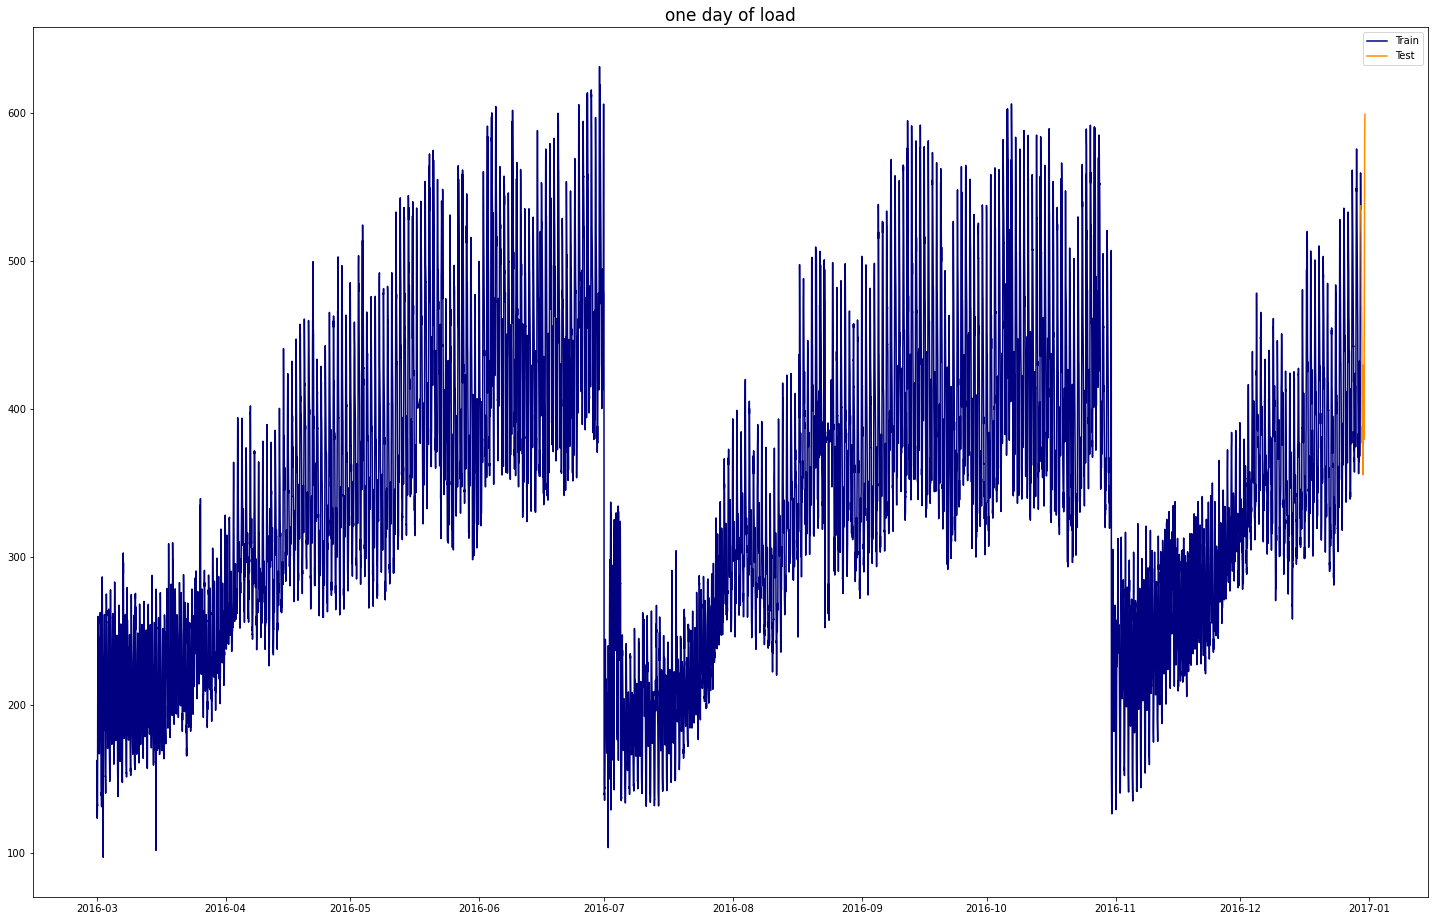

In [4]:
train=df[:14592]
test=df[-48:]
plt.figure(figsize=(25,16))
plt.plot(train,label='Train',color='navy')
plt.plot(test,label='Test',color='darkorange')
plt.title('one day of load',fontsize=17)
plt.legend()
plt.show()

In [5]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 4)
# Generate all different combinations of p, q and q
pdq = list(itertools.product(p, d, q))

In [6]:
warnings.filterwarnings("ignore")
aic= []
parameters = []
for param in pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(df, order=param,enforce_stationarity=True, enforce_invertibility=True)
        results = mod.fit()
        aic.append(results.aic)
        parameters.append(param)
        print('ARIMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue
index_min = min(range(len(aic)), key=aic.__getitem__)           

print('The optimal model is: ARIMA{} -AIC{}'.format(parameters[index_min], aic[index_min]))

ARIMA(0, 0, 0) - AIC:213681.2304326616
ARIMA(0, 0, 1) - AIC:194604.62908840616
ARIMA(0, 0, 2) - AIC:179279.14837430796
ARIMA(0, 0, 3) - AIC:168314.94481176644
ARIMA(0, 1, 0) - AIC:129313.6344814004
ARIMA(0, 1, 1) - AIC:129238.12209795049
ARIMA(0, 1, 2) - AIC:129016.85909234447
ARIMA(0, 1, 3) - AIC:128941.38577560116
ARIMA(0, 2, 0) - AIC:138206.47732840906
ARIMA(0, 2, 1) - AIC:129318.86113726004
ARIMA(0, 2, 2) - AIC:129241.70677934804
ARIMA(0, 2, 3) - AIC:129020.28669980651
ARIMA(0, 3, 0) - AIC:154571.76249469392
ARIMA(0, 3, 1) - AIC:138209.74605301136
ARIMA(0, 3, 2) - AIC:129389.91764148389
ARIMA(0, 3, 3) - AIC:129323.07422361856
ARIMA(1, 0, 0) - AIC:129319.23550374055
ARIMA(1, 0, 1) - AIC:129242.2141571292
ARIMA(1, 0, 2) - AIC:129018.37861492317
ARIMA(1, 0, 3) - AIC:128941.00417809463
ARIMA(1, 1, 0) - AIC:129217.93404356236
ARIMA(1, 1, 1) - AIC:129020.19954281929
ARIMA(1, 1, 2) - AIC:128899.36270951276
ARIMA(1, 1, 3) - AIC:128892.01709071363
ARIMA(1, 2, 0) - AIC:133373.98253358924
ARI

In [7]:
from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(df,order=parameters[index_min])
results = mod.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:              load data   No. Observations:                14640
Model:                 ARIMA(2, 1, 3)   Log Likelihood              -63836.552
Date:                Mon, 03 Oct 2022   AIC                         127685.104
Time:                        10:57:10   BIC                         127730.653
Sample:                    03-01-2016   HQIC                        127700.235
                         - 12-30-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9493      0.002    941.769      0.000       1.945       1.953
ar.L2         -0.9674      0.002   -478.831      0.000      -0.971      -0.963
ma.L1         -1.9735      0.004   -550.415      0.0

In [8]:
prediction=pd.DataFrame(results.predict(n_periods=48),index=test.index)
prediction.columns=['predicted_yield']
prediction

,predicted_yield
datetime,
2016-12-30 00:00:00,533.612487
2016-12-30 00:30:00,534.004092
2016-12-30 01:00:00,527.759238
2016-12-30 01:30:00,518.090546
2016-12-30 02:00:00,512.491852
2016-12-30 02:30:00,509.543083
2016-12-30 03:00:00,497.761753
2016-12-30 03:30:00,490.824905
2016-12-30 04:00:00,476.892452


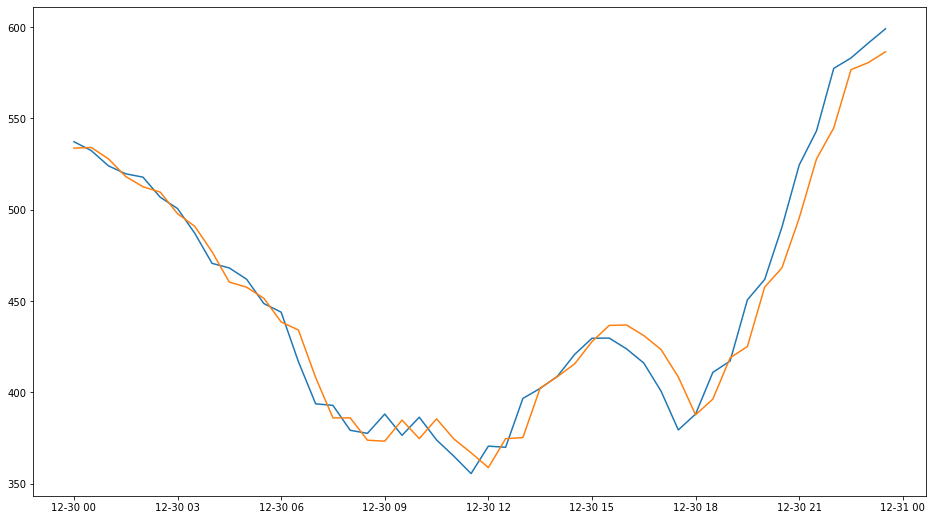

In [9]:
plt.figure(figsize=(16,9))
plt.plot(test)
plt.plot(prediction)

In [10]:
prediction['test_data']=df['load data']
prediction

,predicted_yield,test_data
datetime,,
2016-12-30 00:00:00,533.612487,537.133788
2016-12-30 00:30:00,534.004092,532.319855
2016-12-30 01:00:00,527.759238,523.933272
2016-12-30 01:30:00,518.090546,519.572735
2016-12-30 02:00:00,512.491852,517.749190
2016-12-30 02:30:00,509.543083,506.738539
2016-12-30 03:00:00,497.761753,500.567663
2016-12-30 03:30:00,490.824905,487.017379
2016-12-30 04:00:00,476.892452,470.562508


In [11]:
#to predict future values:
future_results = pd.DataFrame(results.forecast(48))
future_results

,predicted_mean
2016-12-31 00:00:00,592.028416
2016-12-31 00:30:00,583.311030
2016-12-31 01:00:00,572.884232
2016-12-31 01:30:00,560.992501
2016-12-31 02:00:00,547.898878
2016-12-31 02:30:00,533.879595
2016-12-31 03:00:00,519.218651
2016-12-31 03:30:00,504.202411
2016-12-31 04:00:00,489.114343
2016-12-31 04:30:00,474.229984


In [12]:
##def mean_absolute_percentage_error(y_true, y_pred): 
    #return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from statsmodels.tools.eval_measures import rmse

In [13]:
print("r2_score >>>",r2_score(prediction['test_data'], prediction['predicted_yield']))
print("mean_absolute_percentage_error >>>",mean_absolute_percentage_error(prediction['test_data'], prediction['predicted_yield']))
print("median_absolute_error >>>",median_absolute_error(prediction['test_data'], prediction['predicted_yield']))
print("mean_absolute_error >>>",mean_absolute_error(prediction['test_data'], prediction['predicted_yield']))
print("RMSE>>>",rmse(prediction['test_data'], prediction['predicted_yield']))
print("mean_squared_log_error >>>",mean_squared_log_error(prediction['test_data'], prediction['predicted_yield']))

r2_score >>> 0.9638103800682795
mean_absolute_percentage_error >>> 0.02259182742867911
median_absolute_error >>> 6.89436487927847
mean_absolute_error >>> 9.912315882679104
RMSE>>> 12.853875680786391
mean_squared_log_error >>> 0.0008495280576889755


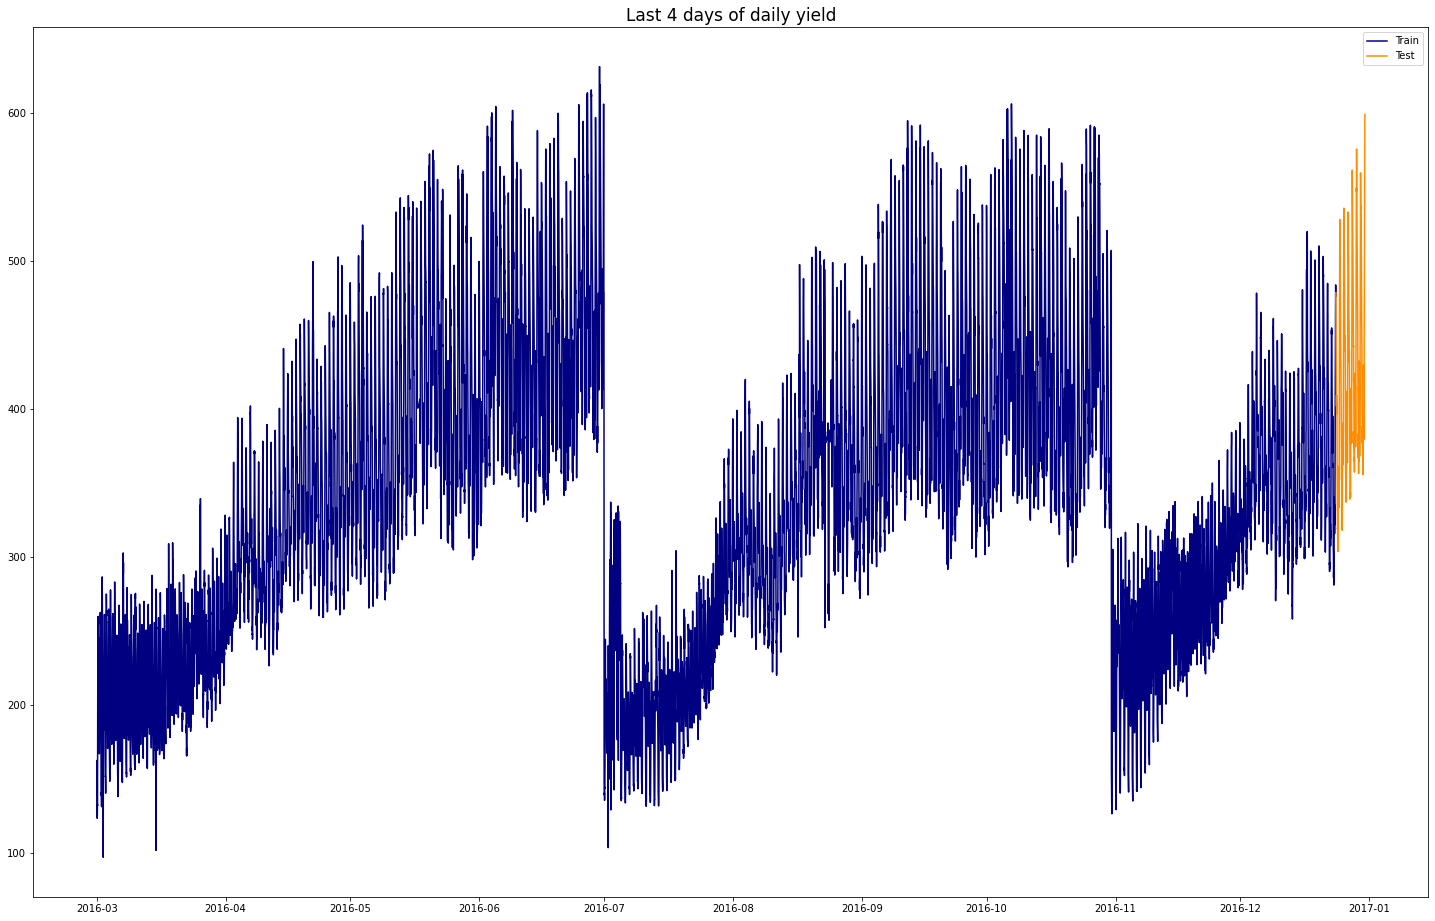

In [14]:
train=df[:14304]
test=df[-336:]
plt.figure(figsize=(25,16))
plt.plot(train,label='Train',color='navy')
plt.plot(test,label='Test',color='darkorange')
plt.title('Last 4 days of daily yield',fontsize=17)
plt.legend()
plt.show()

In [15]:
prediction_week=pd.DataFrame(results.predict(n_periods=336),index=test.index)
prediction_week.columns=['predicted_yield']
prediction_week['Actual Value']=test['load data']
prediction_week

,predicted_yield,Actual Value
datetime,,
2016-12-24 00:00:00,470.533850,478.493406
2016-12-24 00:30:00,471.286250,461.316439
2016-12-24 01:00:00,453.095889,454.485810
2016-12-24 01:30:00,445.098991,445.812521
2016-12-24 02:00:00,435.581459,430.763138
...,...,...
2016-12-30 21:30:00,527.674731,543.026865
2016-12-30 22:00:00,544.674652,577.266153
2016-12-30 22:30:00,576.558735,582.986803


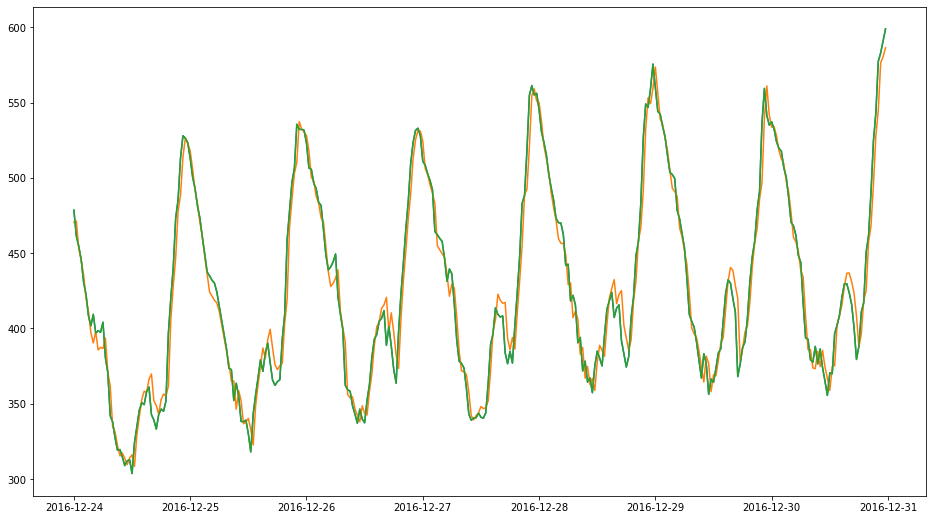

In [16]:
plt.figure(figsize=(16,9))
plt.plot(test)
plt.plot(prediction_week)

In [17]:
print("r2_score >>>",r2_score(test['load data'], prediction_week['predicted_yield']))
print("mean_absolute_percentage_error >>>",mean_absolute_percentage_error(test['load data'], prediction_week['predicted_yield']))
print("median_absolute_error >>>",median_absolute_error(test['load data'], prediction_week['predicted_yield']))
print("mean_absolute_error >>>",mean_absolute_error(test['load data'], prediction_week['predicted_yield']))
print("RMSE>>>",rmse(test['load data'], prediction_week['predicted_yield']))
print("mean_squared_log_error >>>",mean_squared_log_error(test['load data'], prediction_week['predicted_yield']))

r2_score >>> 0.9642306329510767
mean_absolute_percentage_error >>> 0.02272332911786193
median_absolute_error >>> 7.022666147845655
mean_absolute_error >>> 9.482817620632048
RMSE>>> 12.552532905459287
mean_squared_log_error >>> 0.0008973052158783162


In [31]:
def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

In [18]:
for i in range(1,7+1):
    test=df[-48*i:]
    train=df[:(len(df)-len(test))]
    prediction_week=pd.DataFrame(results.predict(n_periods=48*i),index=test.index)
    prediction_week.columns=['predicted_yield']
    print("r2_score >>>",r2_score(test['load data'], prediction_week['predicted_yield']))
    print("mean_absolute_percentage_error >>>",mean_absolute_percentage_error(test['load data'], prediction_week['predicted_yield']))
    print("median_absolute_error >>>",median_absolute_error(test['load data'], prediction_week['predicted_yield']))
    print("mean_absolute_error >>>",mean_absolute_error(test['load data'], prediction_week['predicted_yield']))
    print("RMSE >>>",rmse(test['load data'], prediction_week['predicted_yield']))
    print("mean_squared_log_error >>>",mean_squared_log_error(test['load data'], prediction_week['predicted_yield']))
    print("sMAPE >>>",smape(test['load data'], prediction_week['predicted_yield']))

r2_score >>> 0.9638103800682795
mean_absolute_percentage_error >>> 0.02259182742867911
median_absolute_error >>> 6.89436487927847
mean_absolute_error >>> 9.912315882679104
RMSE >>> 12.853875680786391
mean_squared_log_error >>> 0.0008495280576889755
r2_score >>> 0.9595076025280763
mean_absolute_percentage_error >>> 0.022195516217283228
median_absolute_error >>> 6.82941714335098
mean_absolute_error >>> 9.693114725910702
RMSE >>> 13.124772581335213
mean_squared_log_error >>> 0.0009032081902445498
r2_score >>> 0.9580696506948241
mean_absolute_percentage_error >>> 0.023006245584308745
median_absolute_error >>> 7.3958662291340715
mean_absolute_error >>> 9.968880846929364
RMSE >>> 13.073304458371519
mean_squared_log_error >>> 0.0009073130408735428
r2_score >>> 0.9596151993756566
mean_absolute_percentage_error >>> 0.022984717559959667
median_absolute_error >>> 7.399187418040356
mean_absolute_error >>> 9.913673984569314
RMSE >>> 13.010648027580306
mean_squared_log_error >>> 0.000898689097540352

In [22]:
from sktime.performance_metrics.forecasting import MeanAbsoluteScaledError

In [46]:
x=test.drop('load data',axis=1)

In [47]:
x

""
datetime
2016-12-24 00:00:00
2016-12-24 00:30:00
2016-12-24 01:00:00
2016-12-24 01:30:00
2016-12-24 02:00:00
...
2016-12-30 21:30:00
2016-12-30 22:00:00
2016-12-30 22:30:00


In [58]:
def mde(actual:np.ndarray,predicted:np.ndarray):
    return np.mean((np.sign(actual[1:]-actual[:-1])==np.sign(predicted[1:]-predicted[:-1])).astype(int))
    

In [59]:
mde(prediction['test_data'], prediction['predicted_yield'])

0.9583333333333334

In [60]:
def maape(actual: np.ndarray, predicted: np.ndarray):
    """
    Mean Arctangent Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.mean(np.arctan(np.abs((actual - predicted) / (actual + EPSILON))))
EPSILON = 1e-10

In [61]:
maape(prediction['test_data'], prediction['predicted_yield'])

0.022578423962397568

In [65]:
def mae(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Absolute Error """
    return np.mean(np.abs(_error(actual, predicted)))

In [71]:
mae(prediction['test_data'], prediction['predicted_yield'])

9.912315882679104

In [81]:
def mase(actual, forcast):
    x = (np.asarray(actual)).flatten()
    y = (np.asarray(forcast)).flatten()
    return np.mean(np.abs(x - y) / np.mean(np.abs(x[1:]-x[:-1])))

In [84]:
mase(prediction['test_data'], prediction['predicted_yield'])

0.8204980763123304

In [83]:
def mase(true_series: pd.core.series.Series, pred_series: pd.core.series.Series):
    # Mean absolute scaled error
    y_true, y_hat = true_series.values, pred_series.values
    errors = np.sum(np.abs(y_true - y_hat))
    t = y_true.size
    scale = t/(t-1) * np.sum(np.abs(np.diff(y_true, axis=0)))
    
    return errors / scale